In [17]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.fashion_mnist import load_data

In [19]:
(training_images, training_labels),(test_images, test_labels)= load_data()

In [20]:
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
training_images, test_images = training_images/255.0, test_images/255.0
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

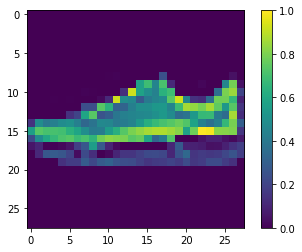

In [22]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
training_images.shape

(60000, 28, 28, 1)

In [24]:
output_classes = len(set(training_labels))
output_classes

10

In [29]:
def create_cnn_model(dropoute_rate):
    input_layer = Input(shape=training_images[0].shape)
    conv1 = Conv2D(32, (3,3), strides=2, activation="relu")(input_layer)
    maxpool1 = MaxPool2D(2,2)(conv1)
    
    
    conv2 = Conv2D(64, (3,3), strides=2, activation="relu")(maxpool1)
    flat1 = Flatten()(conv2)

    drop1 = Dropout(dropoute_rate)(flat1)
    dense1 = Dense(512, activation="relu")(drop1)
    drop2 = Dropout(dropoute_rate)(dense1)
    output_layer = Dense(output_classes, activation= "softmax")(drop2)
    model = Model(input_layer, output_layer)
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
dropoute_rate = 0.2
model = create_cnn_model(dropoute_rate)

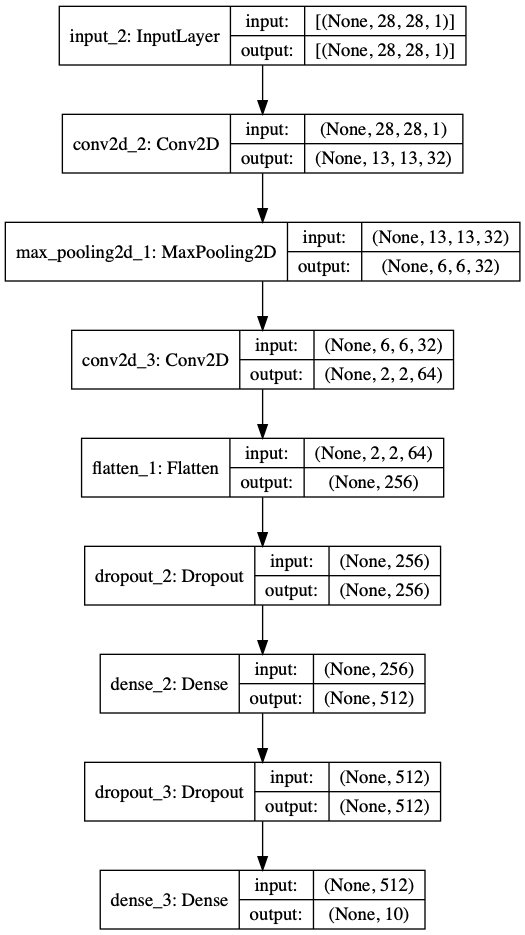

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="../images/model_cnn_plot1.png", show_shapes=True, show_layer_names=True)

In [32]:
model_history = model.fit(training_images, training_labels, epochs=20, 
                          validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7892 - accuracy: 0.7099 - val_loss: 0.4579 - val_accuracy: 0.8326
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4350 - accuracy: 0.8414 - val_loss: 0.3879 - val_accuracy: 0.8563
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3889 - accuracy: 0.8576 - val_loss: 0.3656 - val_accuracy: 0.8651
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3648 - accuracy: 0.8632 - val_loss: 0.3565 - val_accuracy: 0.8710
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3407 - accuracy: 0.8713 - val_loss: 0.3443 - val_accuracy: 0.8753
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.8799 - val_loss: 0.3480 - val_accuracy: 0.8714
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3115 - accuracy: 0.8830 - val_loss: 0.3410 - val_accuracy:

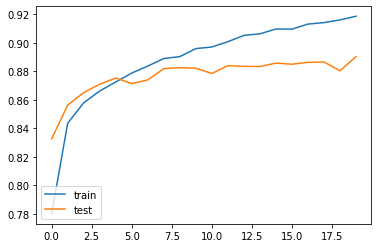

In [33]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['accuracy'], label="accuracy")
plt.plot(model_history.history['val_accuracy'], label="val_accuracy")
plt.legend(['train', 'test'], loc= "lower left")

In [34]:
output = model.predict(test_images)
prediction = np.argmax(output[9])

7


In [42]:
predictions = [np.argmax(output[i]) for i in range(10)]
print(predictions)
print(test_labels[0:10])

[9, 2, 1, 1, 4, 1, 4, 6, 5, 7]
[9 2 1 1 6 1 4 6 5 7]
